<a href="https://colab.research.google.com/github/genaiconference/Agentic_RAG_Workshop/blob/main/09_build_kg_from_unstructured_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neo4J GraphRAG Python Package: Accelerating GenAI With Knowledge Graphs

## Intro to Neo4J GraphRAG

The **GraphRAG Python package** from **Neo4j** provides end-to-end workflows that take you from unstructured data to knowledge graph creation, knowledge graph retrieval, and full GraphRAG pipelines in one place. Whether you’re using Python to build knowledge assistants, search APIs, chatbots, or report generators, this package makes it easy to incorporate knowledge graphs to improve your retrieval-augmented generation (RAG) relevance, accuracy, and explainability.

## Goal of this Notebook

In this notebook, you can learn how to go from **zero to GraphRAG** using the **Neo4j's** **GraphRAG Python package**

This notebook contains an **end-to-end worked example** using the GraphRAG Python package for Neo4j.
- Covers the following
  - unstructured documents (in this case pdf - Leave Policy Document),
  - progresses through knowledge graph construction,
  - knowledge graph retriever design, and
  - complete GraphRAG pipelines.

## GraphRAG Overview

Combining knowledge graphs and RAG, GraphRAG helps solve common issues with large language models (LLMs), like hallucinations


- **Problem with LLMs:** They hallucinate and often lack reliable, domain-specific context

- **Traditional RAG:** Retrieves only fragments of unstructured text → limited context.

- **GraphRAG Advantages**  
  - Leverages **knowledge graphs** for structured + semi-structured data  
  - Provides richer context → reduces hallucinations  
  - Enables more reliable answers  
  - Acts as a **trusted agent** in complex workflows  

- **GraphRAG Python Package Features**  
  - Easy creation and querying of knowledge graphs  
  - Retrieval via:  
    - Graph traversals  
    - Text2Cypher query generation  
    - Vector search  
    - Full-text search  
  - Tooling for **full RAG pipelines**  
  - Seamless integration into GenAI applications & workflows


## Setup & Installations

In [3]:
!git clone https://github.com/genaiconference/Agentic_RAG_Workshop.git

Cloning into 'Agentic_RAG_Workshop'...
remote: Enumerating objects: 463, done.
remote: Counting objects: 100% (234/234), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 463 (delta 142), reused 96 (delta 68), pack-reused 229 (from 2)
Receiving objects: 100% (463/463), 74.67 MiB | 17.34 MiB/s, done.
Resolving deltas: 100% (208/208), done.
Updating files: 100% (71/71), done.


In [4]:
!pip install -r /content/Agentic_RAG_Workshop/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 566.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.9/187.9 kB 15.0 MB/s et

## Pre-Requisites

**1. Create a Neo4j Database:** To work through this RAG example, you need a database for storing and retrieving data. There are many options for this. You can quickly start a free Neo4j Graph Database using [Neo4j AuraDB](https://neo4j.com/product/auradb/?ref=neo4j-home-hero). You can use **AuraDB Free ** or start an **AuraDB Professional (Pro) free trial** for higher ingestion and retrieval performance. The Pro instances have a bit more RAM.

**2. Get Credentials:** You will need:
The Neo4j URI, username, and password variables from when you created the database. If you created your database on AuraDB, they are in the file you downloaded.

# 0. Create a Neo4j Database

Use **AuraDB Free**

- Start a free Neo4j Graph Database using [Neo4j AuraDB](https://neo4j.com/product/auradb/?ref=neo4j-home-hero).

- Once you create an instance, you can download and save the credentials in the .env file to use in the following code.

In [1]:
# Load Environment Variables
import os
os.chdir("/content/Agentic_RAG_Workshop/")

from dotenv import load_dotenv
load_dotenv()

# Load neo4j credentials (and openai api key in background).
NEO4J_URI = os.getenv('NEO4J_URI')
NEO4J_USERNAME = os.getenv('NEO4J_USERNAME')
NEO4J_PASSWORD = os.getenv('NEO4J_PASSWORD')

# 1. Knowledge Graph Building

Let's transform 'Leave Policy Document' into a knowledge graph and store it in our Neo4j database

The `SimpleKGPipeline` class allows you to automatically build a knowledge graph with a few key inputs, including

 - a driver to connect to Neo4j,
 - an LLM for entity extraction, and
 - an embedding model to create vectors on text chunks for similarity search.

### Neo4j Driver

The Neo4j driver allows you to connect and perform read and write transactions with the database.

In [2]:
import neo4j

# Neo4J Graph Driver
neo4j_driver = neo4j.GraphDatabase.driver(NEO4J_URI,
                                         auth=(NEO4J_USERNAME, NEO4J_PASSWORD))

# (Optional) Test the connection
neo4j_driver.verify_connectivity()

### LLM & Embedding Model

In this case, we will use OpenAI **GPT-4o-mini** for convenience. It is a fast and low-cost model.

Likewise, we will use OpenAI’s **text-embedding-3-small** for the embedding model

In [3]:
from neo4j_graphrag.llm import OpenAILLM
from neo4j_graphrag.embeddings.openai import OpenAIEmbeddings


# Neo4J way of defining LLM & embedder
llm=OpenAILLM(
    model_name="gpt-4o-mini",
    model_params={
        "response_format": {"type": "json_object"}, # use json_object formatting for best results
        "temperature": 0 # turning temperature down for more deterministic results
    }
)

# Create text embedder
embedder = OpenAIEmbeddings(
    model="text-embedding-3-small"
)

### Optional Inputs: Schema & Prompt

Adding a graph schema is highly recommended for improving knowledge graph quality. It provides guidance for the node and relationship types to create during entity extraction.

Option-1: Manually define the schema if you are very well aware of the data

  - List of Nodes
  - Relationship Types
  - Patterns (Instructions on how to connect them)

In [4]:
# Example of a manual schema definition (limited nodes)

# node types can be defined with a simple label...
# ... or with a dict if more details are needed, such as a description:
# or a list of properties the LLM will try to attach to the entity
NODE_TYPES = [
    {"label": "Policy", "description": "Represents a leave policy document or section."},
    {"label": "LeaveType", "description": "Represents a specific type of leave (e.g., Annual Leave, Sick Leave)."},
    {"label": "Employee", "description": "Represents an employee or group of employees the policy applies to."},
    {"label": "Duration", "description": "Represents a time duration or limit related to leave."}
]

# same thing for relationships
RELATIONSHIP_TYPES = [
    {"label": "HAS_LEAVE_TYPE", "description": "Connects a Policy to the LeaveTypes it describes."},
    {"label": "APPLIES_TO", "description": "Connects a Policy or LeaveType to the Employees it applies to."},
    {"label": "HAS_DURATION", "description": "Connects a LeaveType to a Duration related to it (e.g., maximum days)."},
    {"label": "REFERENCES", "description": "Connects one Policy section to another or to related information."}
]

# A list of triplet in the format: (source_node_label, relationship_label, target_node_label)
PATTERNS = [
    ("Policy", "HAS_LEAVE_TYPE", "LeaveType"),
    ("LeaveType", "APPLIES_TO", "Employee"),
    ("LeaveType", "HAS_DURATION", "Duration")
]

# Defining the schema parameter (recommended approach)
schema={
    "node_types": NODE_TYPES,
    "relationship_types": RELATIONSHIP_TYPES,
    "patterns": PATTERNS,
    "additional_node_types": True,  # if not required put False
},

Option-2: Use Automatic Schema Extraction using LLM - [See Automatic Schema Extraction](https://neo4j.com/docs/neo4j-graphrag-python/current/user_guide_kg_builder.html#automatic-schema-extraction)

    EXTRACTED: schema="EXTRACTED" or (schema=None, default value)
    
    - The schema is automatically extracted from the input text once using LLM.
    
    - This guiding schema is then used to structure entity and relation extraction for all chunks.
    
    - This guarantees all chunks have the same guiding schema.

In [5]:
# Define a Prompt for Entity Relation Extraction

ENTITY_RELATION_EXTRACTOR_PROMPT = """
You are an elite AI model trained to extract structured data to construct a knowledge graph.

Your task is to:
1. Extract **entities (nodes)** from the given input text.
2. Assign a **type (label)** to each entity (based on context).
3. Extract **relationships** between the nodes. The relationship direction goes from the start node to the end node.
4. Return everything in strict **JSON** format.


**✅ Output Format (Strict JSON):**

Return result as JSON using the following format:
{{"nodes": [ {{"id": "0", "label": "the type of entity", "properties": {{"name": "name of entity" }} }}],
  "relationships": [{{"type": "TYPE_OF_RELATIONSHIP", "start_node_id": "0", "end_node_id": "1", "properties": {{"details": "Description of the relationship"}} }}] }}


- Use only the information from the Input text. Do not add any additional information.
- If the input text is empty, return empty Json.
- Make sure to create as many nodes and relationships as needed to offer rich context.
- An AI knowledge assistant must be able to read this graph and immediately understand the context.

Use only the following nodes and relationships (if provided):
{schema}

- Assign a unique string ID (e.g., "0", "1", "2", ...) to each node, and reuse it to define relationships.
- Relationship direction must be logical and context-driven.
- Do not include explanations, markdown, or non-JSON text.
- Ensure double quotes around all JSON property keys/values.
- Do NOT wrap the JSON in backticks or a list.

---
**Example:**

Input text:
"Bob joined Acme Corp as a Data Scientist in 2022."

Output:
{{
  "nodes": [
    {{"id": "0", "label": "Person", "properties": {{"name": "Bob"}}}},
    {{"id": "1", "label": "Organization", "properties": {{"name": "Acme Corp"}}}}
  ],
  "relationships": [
    {{"type": "WORKS_AT", "start_node_id": "0", "end_node_id": "1", "properties": {{"role": "Data Scientist", "since": "2022"}}}}
  ]
}}

---
Input text:

{text}
"""

### Using Custom Components

For advanced customization or when using a custom implementation, you can pass instances of specific components to the SimpleKGPipeline. The components that can customized at the moment are

 - text_splitter: must be an instance of TextSplitter

 - pdf_loader: must be an instance of PdfLoader

For instance, the following code can be used to load the input PDF file and customize the chunk size and chunk overlap in the text splitter component

In [8]:
from neo4j_graphrag.experimental.components.text_splitters.fixed_size_splitter import FixedSizeSplitter
from neo4j_graphrag.experimental.components.pdf_loader import PdfLoader

pdf_loader = PdfLoader()

text_splitter = FixedSizeSplitter(chunk_size=500, chunk_overlap=100)

### Simple KG Pipeline

The simplest way to begin building a KG from unstructured data using this package is utilizing the SimpleKGPipeline interface:



In [12]:
# Creating the SimpleKGPipeline
## Create the SimpleKGPipeline using the constructor below:

from neo4j_graphrag.experimental.components.text_splitters.fixed_size_splitter import FixedSizeSplitter
from neo4j_graphrag.experimental.pipeline.kg_builder import SimpleKGPipeline

kg_builder_pdf = SimpleKGPipeline(
   llm=llm,
   embedder=embedder,
   driver=neo4j_driver,
   pdf_loader=pdf_loader,
   schema="EXTRACTED",
   text_splitter=text_splitter,
   prompt_template=ENTITY_RELATION_EXTRACTOR_PROMPT,
   perform_entity_resolution=True,  #default
   from_pdf=True
)

Below, we run the SimpleKGPipeline to construct our knowledge graph from Leave Policy Document and store in Neo4j.

In [13]:
pdf_file_path = os.getcwd() + '/data/HR Policies/Leave_Policy.pdf'

print(f"Processing : {pdf_file_path}")
pdf_result = await kg_builder_pdf.run_async(file_path=pdf_file_path)
print(f"Result: {pdf_result}")

Processing : /content/Agentic_RAG_Workshop/data/HR Policies/Leave_Policy.pdf
Result: run_id='d97d4f74-bd9a-4a83-b941-301aefd69002' result={'resolver': {'number_of_nodes_to_resolve': 52, 'number_of_created_nodes': 26}}


### Explore the Knowledge Graph on the console

Once complete, you can explore the resulting knowledge graph. The [Unified Console](https://console-preview.neo4j.io/?mpp=4bfb2414ab973c741b6f067bf06d5575&mpid=%24device%3A52a0a77f-5872-4083-bffe-cdab127e370a&_gl=1*w5cmpj*_gcl_au*MTEzODAwNjExOC4xNzQ4OTU4ODkx*_ga*MTE4ODg3MDU0Ni4xNzQwOTc3NTU5*_ga_DL38Q8KGQC*czE3NTU4NDIyMzMkbzk5JGcxJHQxNzU1ODQ0MzczJGo1NyRsMCRoMA..*_ga_DZP8Z65KK4*czE3NTU4NDIyMzMkbzEwMCRnMSR0MTc1NTg0NDM3MyRqNTckbDAkaDA.) provides a great interface for this.

Go to the Query tab and enter the below query to see a sample of the graph.

    
    MATCH (n)-[r]->(m) RETURN n, r, m


# 2. Retrieve Data From Your Knowledge Graph

The GraphRAG Python package provides multiple classes for retrieving data from your knowledge graph, including:

- **Vector Retriever:** performs similarity searches using vector embeddings

- **Vector Cypher Retriever:** combines vector search with retrieval queries in Cypher, Neo4j’s Graph Query language, to traverse the graph and incorporate additional nodes and relationships.

- **Hybrid Retriever:** Combines vector and full-text search.

- **Hybrid Cypher Retriever:** Combines vector and full-text search with Cypher retrieval queries for additional graph traversal.

- **Text2Cypher:** converts natural language queries into Cypher queries to run against Neo4j.

## Vector Retriever

The Vector Retriever uses Approximate Nearest Neighbor (ANN) vector search to retrieve data from your knowledge graph.

We can create a vector index in Neo4j to allow this retriever to pull back information from Chunk nodes.

In [16]:
from neo4j_graphrag.indexes import create_vector_index

create_vector_index(neo4j_driver, name="text_embeddings", label="Chunk",
                   embedding_property="embedding", dimensions=1536, similarity_fn="cosine")

You can then instantiate the vector retriever using the code below:

In [19]:
from neo4j_graphrag.retrievers import VectorRetriever

vector_retriever = VectorRetriever(
   neo4j_driver,
   index_name="text_embeddings",
   embedder=embedder,
   #return_properties=["text"],
)

Now, let’s run this retriever with a simple prompt. The retriever can pull back text chunks and vector similarity scores, providing some useful context for answering questions in RAG.

In [30]:
import json

vector_res = vector_retriever.get_search_results(query_text = "How many leaves can an associate avail?",
             top_k=3)
for i in vector_res.records: print("====n" + json.dumps(i.data(), indent=4))

====n{
    "node": {
        "index": 4,
        "text": "the year will be credited with leave on \na pro-rate basis for the remaining part of the financial year.  \nNew Joiners joining on or before the 15 th of the month are entitled to (2) two days \nAL for the first month and those joining after the 15th of the month are entitled to 1 \n(one) AL for the month.  \nAssociates can avail a minimum of half day Annual Leave at a time. \nAccumulation \nIn a given year, an associate can carry forward a maximum of 10 days of AL. The \nbalance AL of that year would ",
        "embedding": null
    },
    "nodeLabels": [
        "__KGBuilder__",
        "Chunk"
    ],
    "elementId": "4:f0e7f8ae-08a5-4a9d-a552-147bfa830751:60",
    "id": "4:f0e7f8ae-08a5-4a9d-a552-147bfa830751:60",
    "score": 0.8110933303833008
}
====n{
    "node": {
        "index": 6,
        "text": "joining during the year, the accumulation of leaves will be pro-rated \nup to a maximum limit of 10 days.  \nPage 3 of 7 \

## Vector Cypher Retriever

Another useful retriever to explore is the Vector Cypher Retriever, which lets you use Cypher, Neo4j’s graph query language, to incorporate graph traversal logic after retrieving an initial set of nodes with vector search. Below we create a retriever to obtain relevant nodes via vector search, then traversing out on entities up to 3 hops out.

In [31]:
from neo4j_graphrag.retrievers import VectorCypherRetriever

vc_retriever = VectorCypherRetriever(
   neo4j_driver,
   index_name="text_embeddings",
   embedder=embedder,
   retrieval_query="""
//1) Go out 2-3 hops in the entity graph and get relationships
WITH node AS chunk
MATCH (chunk)<-[:FROM_CHUNK]-()-[relList:!FROM_CHUNK]-{1,2}()
UNWIND relList AS rel

//2) collect relationships and text chunks
WITH collect(DISTINCT chunk) AS chunks,
 collect(DISTINCT rel) AS rels

//3) format and return context
RETURN '=== text ===n' + apoc.text.join([c in chunks | c.text], 'n---n') + 'nn=== kg_rels ===n' +
 apoc.text.join([r in rels | startNode(r).name + ' - ' + type(r) + '(' + coalesce(r.details, '') + ')' +  ' -> ' + endNode(r).name ], 'n---n') AS info
"""
)

Submitting the same prompt, here’s the context we get back:

In [32]:
vc_res = vc_retriever.get_search_results(query_text = "How many leaves can an associate avail?", top_k=3)

# print output
kg_rel_pos = vc_res.records[0]['info'].find('nn=== kg_rels ===n')
print("# Text Chunk Context:")
print(vc_res.records[0]['info'][:kg_rel_pos])
print("# KG Context From Relationships:")
print(vc_res.records[0]['info'][kg_rel_pos:])

# Text Chunk Context:
=== text ===nthe year will be credited with leave on 
a pro-rate basis for the remaining part of the financial year.  
New Joiners joining on or before the 15 th of the month are entitled to (2) two days 
AL for the first month and those joining after the 15th of the month are entitled to 1 
(one) AL for the month.  
Associates can avail a minimum of half day Annual Leave at a time. 
Accumulation 
In a given year, an associate can carry forward a maximum of 10 days of AL. The 
balance AL of that year would n---njoining during the year, the accumulation of leaves will be pro-rated 
up to a maximum limit of 10 days.  
Page 3 of 7 
Back to Contents 
Encashment 
Encashment of leaves will be calculated on Base Salary’ (not basic salary) as per the 
formula “Base Salary / 26 * no. of leaves”  
Guidelines 
Intervening Holidays do not form part of the Annual Leave. 
AL can be combined with Sick Leave.  
If associate could not make use of the leave after it was sanctioned,

### Limitations of Vector Retrieval

**Domain-specific limitations**: Vector search can struggle with domain-specific terms or jargon that are not well-represented in the embedding model’s training data.

**Not ideal for precise string matching**: It may not accurately find results when the query depends on exact matches for specific names, numbers, or dates.


## Full-Text Indexes
Fortunately, there is a solution to this issue: full-text indexes. Unlike vector indexes, which match strings based on semantic similarity, full-text indexes match pieces of text based on lexical similarity, meaning they compare the exact wording or text structure.

In [34]:
from neo4j_graphrag.indexes import create_fulltext_index

def get_unique_entity_properties():
    cypher = """
    MATCH (n:`__Entity__`)
    UNWIND keys(n) AS property
    RETURN DISTINCT property ORDER BY property
    """
    with neo4j_driver.session() as session:
        result = session.run(cypher)
        # Extract property values into a Python list
        return [record["property"] for record in result]

create_fulltext_index(
        neo4j_driver,
        "fulltext_index",
        label="Chunk",
        node_properties=get_unique_entity_properties()
    )

## Hybrid Retriever




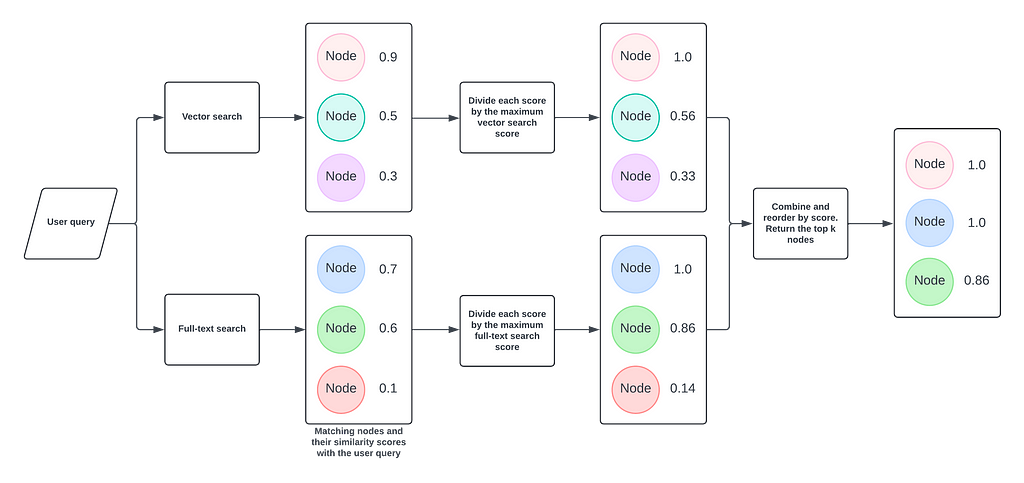

We can use full-text indexes for our GraphRAG applications by using the HybridRetriever class from the Neo4j GraphRAG Python library. This retriever leverages both a vector index and a full-text index in a process known as hybrid search. It uses the user query to search both indexes, retrieving nodes and their corresponding scores. After normalizing the scores from each set of results, it merges them, ranks the combined results by score, and returns the top matches.

In [36]:
from neo4j_graphrag.retrievers import HybridRetriever
import json # Import json to handle the content string

hybrid_retriever = HybridRetriever(
    driver=neo4j_driver,
    vector_index_name="text_embeddings",
    fulltext_index_name="fulltext_index",
    embedder=embedder,
)

query_text = "How many leaves can an associate avail annually?"

try:
    retriever_result = hybrid_retriever.search(query_text=query_text, top_k=3)

    # Process and print the results
    print("Hybrid Retriever Results (excluding embedding):")
    for item in retriever_result.items:
         print(item.content)

except Exception as e:
    print(f"Error processing item: {e}")
    print(f"Item content: {item.content}")

Hybrid Retriever Results (excluding embedding):
{'index': 4, 'text': 'the year will be credited with leave on \na pro-rate basis for the remaining part of the financial year.  \nNew Joiners joining on or before the 15 th of the month are entitled to (2) two days \nAL for the first month and those joining after the 15th of the month are entitled to 1 \n(one) AL for the month.  \nAssociates can avail a minimum of half day Annual Leave at a time. \nAccumulation \nIn a given year, an associate can carry forward a maximum of 10 days of AL. The \nbalance AL of that year would ', 'embedding': None}
{'index': 5, 'text': 'year, an associate can carry forward a maximum of 10 days of AL. The \nbalance AL of that year would automatically lapse on 31st March. \nFor hires during the leave calendar year, the leave accumulation will be pro-rated up \nto a maximum of 10 days. \nAL can be accumulated up to a maximum of 65 days in total. Any leave balance in \nexcess of 65 days will lapse without any enc

## Hybrid Cypher Retriever
The HybridCypherRetriever enhances the hybrid search process by adding a graph traversal step. It begins by identifying an initial set of nodes through a combined search over vector and full-text indexes, then uses a specified Cypher query to retrieve additional information from the graph for each of these nodes.

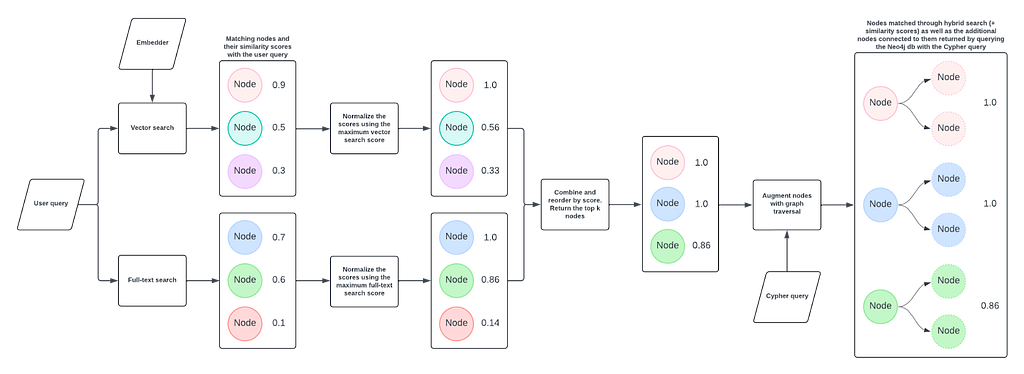

To make use of this retriever, we first need to write a Cypher query to specify exactly what additional information to fetch along with each of the nodes retrieved through hybrid search. Given we are looking to answer questions about actors in movies, we can use the following query:

In [37]:
retrieval_query="""
//1) Go out 2-3 hops in the entity graph and get relationships
WITH node AS chunk
MATCH (chunk)<-[:FROM_CHUNK]-()-[relList:!FROM_CHUNK]-{1,2}()
UNWIND relList AS rel

//2) collect relationships and text chunks
WITH collect(DISTINCT chunk) AS chunks,
 collect(DISTINCT rel) AS rels

//3) format and return context
RETURN '=== text ===n' + apoc.text.join([c in chunks | c.text], 'n---n') + 'nn=== kg_rels ===n' +
 apoc.text.join([r in rels | startNode(r).name + ' - ' + type(r) + '(' + coalesce(r.details, '') + ')' +  ' -> ' + endNode(r).name ], 'n---n') AS info
"""

We then pass this query to the HybridCypherRetriever with the names of the vector and full-text indexes we want to search.

In [40]:
from neo4j_graphrag.retrievers import HybridCypherRetriever

hc_retriever = HybridCypherRetriever(
    driver=neo4j_driver,
    vector_index_name="text_embeddings",
    fulltext_index_name="fulltext_index",
    retrieval_query=retrieval_query,
    embedder=embedder,
)
query_text = "How many leaves can an associate avail annually?"
retriever_result = hc_retriever.search(query_text=query_text, top_k=3)

# Print only the content of the retrieved items
for item in retriever_result.items:
    print(item.content)

<Record info='=== text ===nthe year will be credited with leave on \na pro-rate basis for the remaining part of the financial year.  \nNew Joiners joining on or before the 15 th of the month are entitled to (2) two days \nAL for the first month and those joining after the 15th of the month are entitled to 1 \n(one) AL for the month.  \nAssociates can avail a minimum of half day Annual Leave at a time. \nAccumulation \nIn a given year, an associate can carry forward a maximum of 10 days of AL. The \nbalance AL of that year would n---nyear, an associate can carry forward a maximum of 10 days of AL. The \nbalance AL of that year would automatically lapse on 31st March. \nFor hires during the leave calendar year, the leave accumulation will be pro-rated up \nto a maximum of 10 days. \nAL can be accumulated up to a maximum of 65 days in total. Any leave balance in \nexcess of 65 days will lapse without any encashment. \nFor associates joining during the year, the accumulation of leaves will

## Text2Cypher Retriever

This retriever first asks an LLM to generate a Cypher query to fetch the exact information required to answer the question from the database. Then this query is executed and the resulting records are added to the context for the LLM to write the answer to the initial user question.

The workflow for generating Cypher queries from natural language questions can
be broken down into the following steps:
- Retrieve the question from the user.
- Retrieve the schema of the knowledge graph.
- Define other useful information like terminology mappings, format instructions, and few-shot examples.
- Generate the prompt for the LLM.
- Pass the prompt to the LLM to generate the Cypher query.


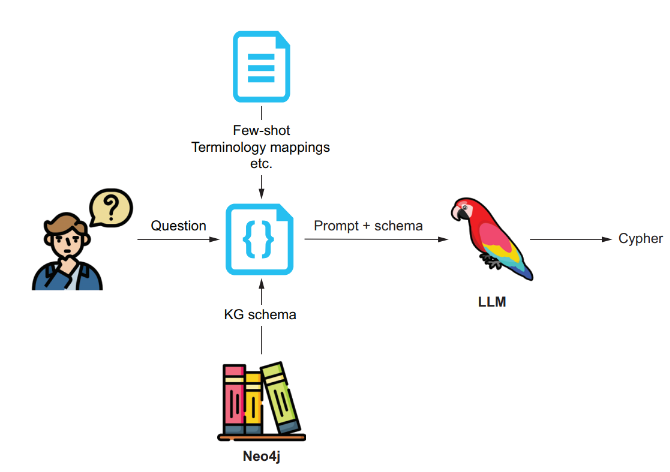

In [47]:
from neo4j_graphrag.retrievers import Text2CypherRetriever
from neo4j_graphrag.schema import get_schema

# Neo4J way of defining LLM & embedder
llm2=OpenAILLM(
    model_name="gpt-4o-mini",
    model_params={
        "temperature": 0 # turning temperature down for more deterministic results
    }
)


# Initialize the Text2Cypher retriever
t2c_retriever = Text2CypherRetriever(
    llm=llm2,
    neo4j_schema=get_schema(neo4j_driver),
    driver=neo4j_driver,
)

# Define a sample query in natural language
query_text = "How many leave types exist?"

# Use the retriever to convert the natural language query to a Cypher query and execute it
response = t2c_retriever.search(query_text=query_text)

# Print the generated Cypher query and the results
print("Generated Cypher Query:")
print(response.metadata['cypher'])
print("\nResults:")
for record in response.items:
    print(record.content)

Generated Cypher Query:
MATCH (lt:LeaveType) RETURN COUNT(lt) AS leaveTypeCount

Results:
<Record leaveTypeCount=16>


# GraphRAG

To turn the retriever search into a full GraphRAG pipeline, we simply add the following code:

Let's continue by running the GraphRAG pipeline with each of the defined retrievers.

In [49]:
from neo4j_graphrag.generation import GraphRAG
from IPython.display import display, Markdown
import json

def query_graph(retriever, llm, query_text, retriever_config):
  """Queries the graph using a GraphRAG pipeline.

  Args:
    retriever: The retriever to use.
    llm: The language model to use.
    query_text: The query text.
    retriever_config: The retriever configuration.

  Returns:
    The response from the GraphRAG pipeline.
  """
  # Initialize the RAG pipeline
  rag = GraphRAG(retriever=retriever, llm=llm2)

  # Query the graph
  response = rag.search(query_text=query_text,
                        retriever_config=retriever_config,
                        return_context=True,
                        response_fallback="I can not answer this question because I have no relevant context.",
                        # config={"callbacks": [langfuse_handler]}
                        )
  return response.answer

query_text = "What are the different types of leave offered to the associates?"
top_k_value = 5

# Get results from Vector Retriever using query_graph function
display(Markdown("### Vector Retriever Results (using GraphRAG)"))
response = query_graph(vector_retriever, llm, query_text, {"top_k": top_k_value})
display(Markdown(response))

# Get results from Vector Cypher Retriever using query_graph function
display(Markdown("### Vector Cypher Retriever Results (using GraphRAG)"))
response = query_graph(vc_retriever, llm, query_text, {"top_k": top_k_value})
display(Markdown(response))

# Get results from Text2Cypher Retriever using the query_graph function
display(Markdown("### Text2Cypher Retriever Results (using GraphRAG)"))
# response = query_graph(t2c_retriever, llm, query_text, {})
# display(Markdown(response))

# Get results from Hybrid Retriever using query_graph function
display(Markdown("### Hybrid Retriever Results (using GraphRAG)"))
response = query_graph(hybrid_retriever, llm, query_text, {"top_k": top_k_value})
display(Markdown(response))

# Get results from Hybrid Cypher Retriever using the query_graph function
display(Markdown("### Hybrid Cypher Retriever Results (using GraphRAG)"))
response = query_graph(hc_retriever, llm, query_text, {"top_k": top_k_value})
display(Markdown(response))

### Vector Retriever Results (using GraphRAG)

The different types of leave offered to associates include:

1. **Annual Leave (AL)**: Associates are entitled to 29 working days of AL per financial year, with pro-rata adjustments for those joining mid-year.

2. **Marriage Leave**: Associates can avail 2 days of leave for their own marriage, which must be taken consecutively.

3. **Bereavement Leave**: In the event of the death of a parent, sibling, spouse, or child, associates may take 2 days of leave within 3 months of the event.

4. **Sick Leave**: This leave is provided for associates to recover from illness. 

Additional details about leave management and conditions may apply, but these are the primary types of leave mentioned.

### Vector Cypher Retriever Results (using GraphRAG)

The different types of leave offered to associates include:

1. **Annual Leave (AL)**: Associates are entitled to 29 working days of AL per financial year, with pro-rata adjustments for new joiners.
2. **Marriage Leave**: Associates can avail 2 days of leave for their own marriage, which must be taken consecutively.
3. **Bereavement Leave**: Associates may take 2 days of leave within 3 months of the death of a parent, sibling, spouse, or child.
4. **Sick Leave**: This leave is provided for associates to recover from illness.
5. **Leave Without Pay**: This type of leave can be sanctioned by the manager.
6. **Compensatory Off**: This leave can also be sanctioned by the manager.
7. **Parental Leave**: Available for birthing and non-birthing parents, subject to manager approval.

Each type of leave has specific conditions and entitlements associated with it.

### Text2Cypher Retriever Results (using GraphRAG)

### Hybrid Retriever Results (using GraphRAG)

The different types of leave offered to associates include:

1. **Annual Leave (AL)**: Associates are entitled to 29 working days of AL for the financial year, credited on 1st April. New joiners receive AL on a pro-rata basis depending on their joining date.

2. **Marriage Leave**: Associates can avail 2 days of leave at the time of their own marriage, which must be taken consecutively. This leave can be combined with a weekend if the marriage falls over that time.

3. **Bereavement Leave**: In the event of the death of a parent, sibling, spouse, or child, associates may take 2 days of leave within a period of 3 months following the event.

4. **Sick Leave**: This leave is provided to associates to recover from illness or injury, although specific details on the entitlement were not provided in the context. 

Additionally, there are rules regarding the cancellation of leave and the adjustment of excess AL upon resignation or superannuation.

### Hybrid Cypher Retriever Results (using GraphRAG)

The different types of leave offered to associates include:

1. **Annual Leave (AL)**: Associates are entitled to 29 working days of AL per financial year, with pro-rata credits for those joining mid-year.

2. **Marriage Leave**: Associates can avail 2 consecutive days of leave for their own marriage, which can be combined with a weekend if applicable.

3. **Bereavement Leave**: Associates may take 2 days of leave within 3 months of the death of a parent, sibling, spouse, or child.

4. **Sick Leave**: This leave is provided for associates to recover from illness.

5. **Leave Without Pay**: This type of leave can be sanctioned by the manager.

6. **Compensatory Off**: This leave can also be sanctioned by the manager.

7. **Parental Leave**: Available for both birthing and non-birthing parents, subject to manager approval.

These leave types are subject to specific conditions and entitlements as outlined in the organization's policies.